<a href="https://colab.research.google.com/github/mohammadAliMkh/PytorchClassification/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
x , y = make_circles(1000 , shuffle = True , noise = 0.03)

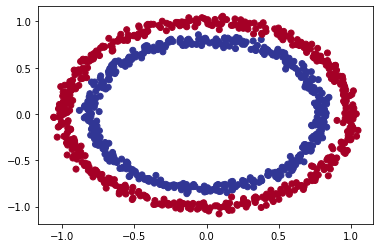

In [3]:
plt.scatter(x = x[: , 0] , y = x[:,1] , c = y , cmap = "RdYlBu")

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
train_data , test_data, train_label , test_label = train_test_split(x , y , test_size = 0.2)

In [6]:
train_data = torch.from_numpy(train_data).type(torch.float)
train_label = torch.from_numpy(train_label).type(torch.float)
test_label = torch.from_numpy(test_label).type(torch.float)
test_data = torch.from_numpy(test_data).type(torch.float)

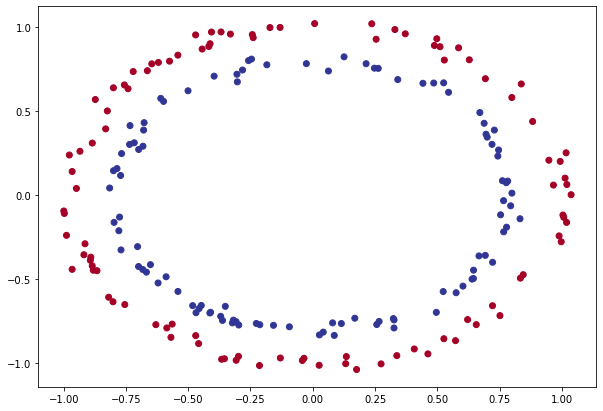

In [7]:
plt.figure(figsize = (10 , 7))
plt.scatter(x = test_data[: , 0] , y = test_data[: , 1] , c = test_label , cmap = "RdYlBu")

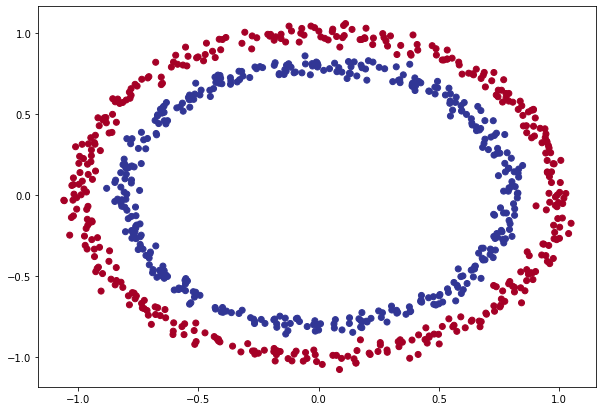

In [8]:
plt.figure(figsize = (10 , 7))
plt.scatter(x = train_data[: , 0] , y = train_data[: , 1] , c = train_label , cmap = "RdYlBu")

In [9]:
class Classification(torch.nn.Module):
  def __init__(self):
    super().__init__();
    self.linear1 = torch.nn.Linear(in_features = 2 , out_features = 5)
    self.linear2 = torch.nn.Linear(in_features = 5 , out_features = 1)
    # self.layers = torch.nn.Sequential(
    #     torch.nn.Linear(in_features = 2 , out_features = 5),
    #     torch.nn.Linear(in_features = 5 , out_features = 1)
    # ).to(device)
  
  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.linear2(self.linear1(x))
    # return self.layers(x)

In [10]:
clf = Classification().to(device)

In [11]:
clf

Classification(
  (linear1): Linear(in_features=2, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
clf_model = torch.nn.Sequential(
    torch.nn.Linear(in_features = 2 , out_features = 5),
    torch.nn.Linear(in_features = 5, out_features = 1)
).to(device)

In [13]:
clf_model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
clf

Classification(
  (linear1): Linear(in_features=2, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
with torch.inference_mode():
  preds = clf_model(train_data.to(device))
preds = preds
preds[:10] , train_label[:10]

(tensor([[0.1140],
         [0.6536],
         [0.5632],
         [0.6576],
         [0.1280],
         [0.6879],
         [0.5810],
         [0.4546],
         [0.8027],
         [0.1452]]), tensor([1., 1., 0., 1., 1., 1., 0., 0., 0., 1.]))

In [16]:
with torch.inference_mode():
  preds = clf(train_data.to(device))
preds[:10] , train_label[:10]

(tensor([[0.4691],
         [0.5149],
         [0.5586],
         [0.4084],
         [0.4378],
         [0.4220],
         [0.3600],
         [0.5698],
         [0.4473],
         [0.4246]]), tensor([1., 1., 0., 1., 1., 1., 0., 0., 0., 1.]))

In [17]:
print("this is a test that i know wether colab will know my changes in codes")

this is a test that i know wether colab will know my changes in codes
